In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [8]:
data = pd.read_csv('./data/low_temp_19_06.csv')
data.head(5)

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed actual liquid flow, m3/h","gas_feed actual vapour flow, m3/h",gas_feed mass heat capacity,gas_feed vapour fraction,"gas_feed molar flow, kgmole/h",...,17 mass heat capacity,17 vapour fraction,"17 molar flow, kgmole/h",17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
0,-16.0,4232.0,18878.0,23.886155,72.430533,15.214508,245.421431,2.559543,0.758989,0.219537,...,2.251392,0.005083,0.048132,5.404426e-02,0.036171,0.217006,0.180343,0.452925,0.024123,0.035387
1,1.0,4833.0,7853.0,23.778683,74.311097,5.086837,100.590515,2.656815,0.818161,0.091737,...,2.475215,0.000000,0.015413,3.027299e-02,0.077611,0.109804,0.516098,0.234971,0.014643,0.016601
2,-22.0,4414.0,7030.0,24.589672,90.075960,6.902782,71.142459,2.669121,0.680374,0.079415,...,3.285931,0.000258,0.014639,4.030112e-07,0.057266,0.234016,0.302420,0.376537,0.019800,0.009960
3,-3.0,4493.0,27213.0,22.271846,61.124750,14.281073,430.923204,2.575105,0.862006,0.339405,...,3.117985,0.000000,0.040468,7.377296e-03,0.017134,0.182255,0.258367,0.422353,0.058061,0.054453
4,-13.0,4845.0,15393.0,23.169794,79.132676,11.413371,183.108043,2.667372,0.785855,0.184543,...,2.299467,0.004158,0.035108,4.744479e-02,0.049843,0.185275,0.329214,0.311684,0.026514,0.050026


In [5]:
# Расчитываем дополнительные параметры
data['gas_feed vapour molar flow, kgmole/h'] = data['gas_feed vapour fraction'] * data['gas_feed molar flow, kgmole/h']
data['gas_feed liquid molar flow, kgmole/h'] = data['gas_feed molar flow, kgmole/h'] - data['gas_feed vapour molar flow, kgmole/h']

In [4]:
list(data.columns)

['gas_feed temperature, C',
 'gas_feed pressure, kPa',
 'gas_feed mass flow, kg/h',
 'gas_feed molecular weight',
 'gas_feed Mass density, kg/m3',
 'gas_feed actual liquid flow, m3/h',
 'gas_feed actual vapour flow, m3/h',
 'gas_feed mass heat capacity',
 'gas_feed vapour fraction',
 'gas_feed molar flow, kgmole/h',
 'gas_feed Methane mass frac',
 'gas_feed Ethane mass frac',
 'gas_feed Propane mass frac',
 'gas_feed i-Butane mass frac',
 'gas_feed n-Butane mass frac',
 'gas_feed i-Pentane mass frac',
 'gas_feed n-Pentane mass frac',
 'Q-104',
 'Q-100',
 'Comp Fraction',
 '1 temperature, C',
 '1 pressure, kPa',
 '1 mass flow, kg/h',
 '1 molecular weight',
 '1 Mass density, kg/m3',
 '1 actual liquid flow, m3/h',
 '1 actual vapour flow, m3/h',
 '1 mass heat capacity',
 '1 vapour fraction',
 '1 molar flow, kgmole/h',
 '1 Methane mass frac',
 '1 Ethane mass frac',
 '1 Propane mass frac',
 '1 i-Butane mass frac',
 '1 n-Butane mass frac',
 '1 i-Pentane mass frac',
 '1 n-Pentane mass frac',
 

# Определяем плотность сырьевого газа

In [22]:
gas_feed_dens_data = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed Mass density, kg/m3',
]]

In [23]:
gas_feed_dens_data.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,"gas_feed Mass density, kg/m3"
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,0.199824,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,74.084199
std,10.275480,404.079523,7214.000778,2.113006,0.084434,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,18.272784
min,-25.000000,3500.000000,5000.000000,17.914715,0.045560,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,32.152684
25%,-17.000000,3861.000000,11270.000000,23.020770,0.127574,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,60.824100
50%,-9.000000,4214.000000,17512.000000,24.479015,0.198404,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,71.535329
75%,0.000000,4560.000000,23749.750000,25.973181,0.269190,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,84.574906
max,10.000000,4900.000000,30000.000000,31.365853,0.449307,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,202.689706


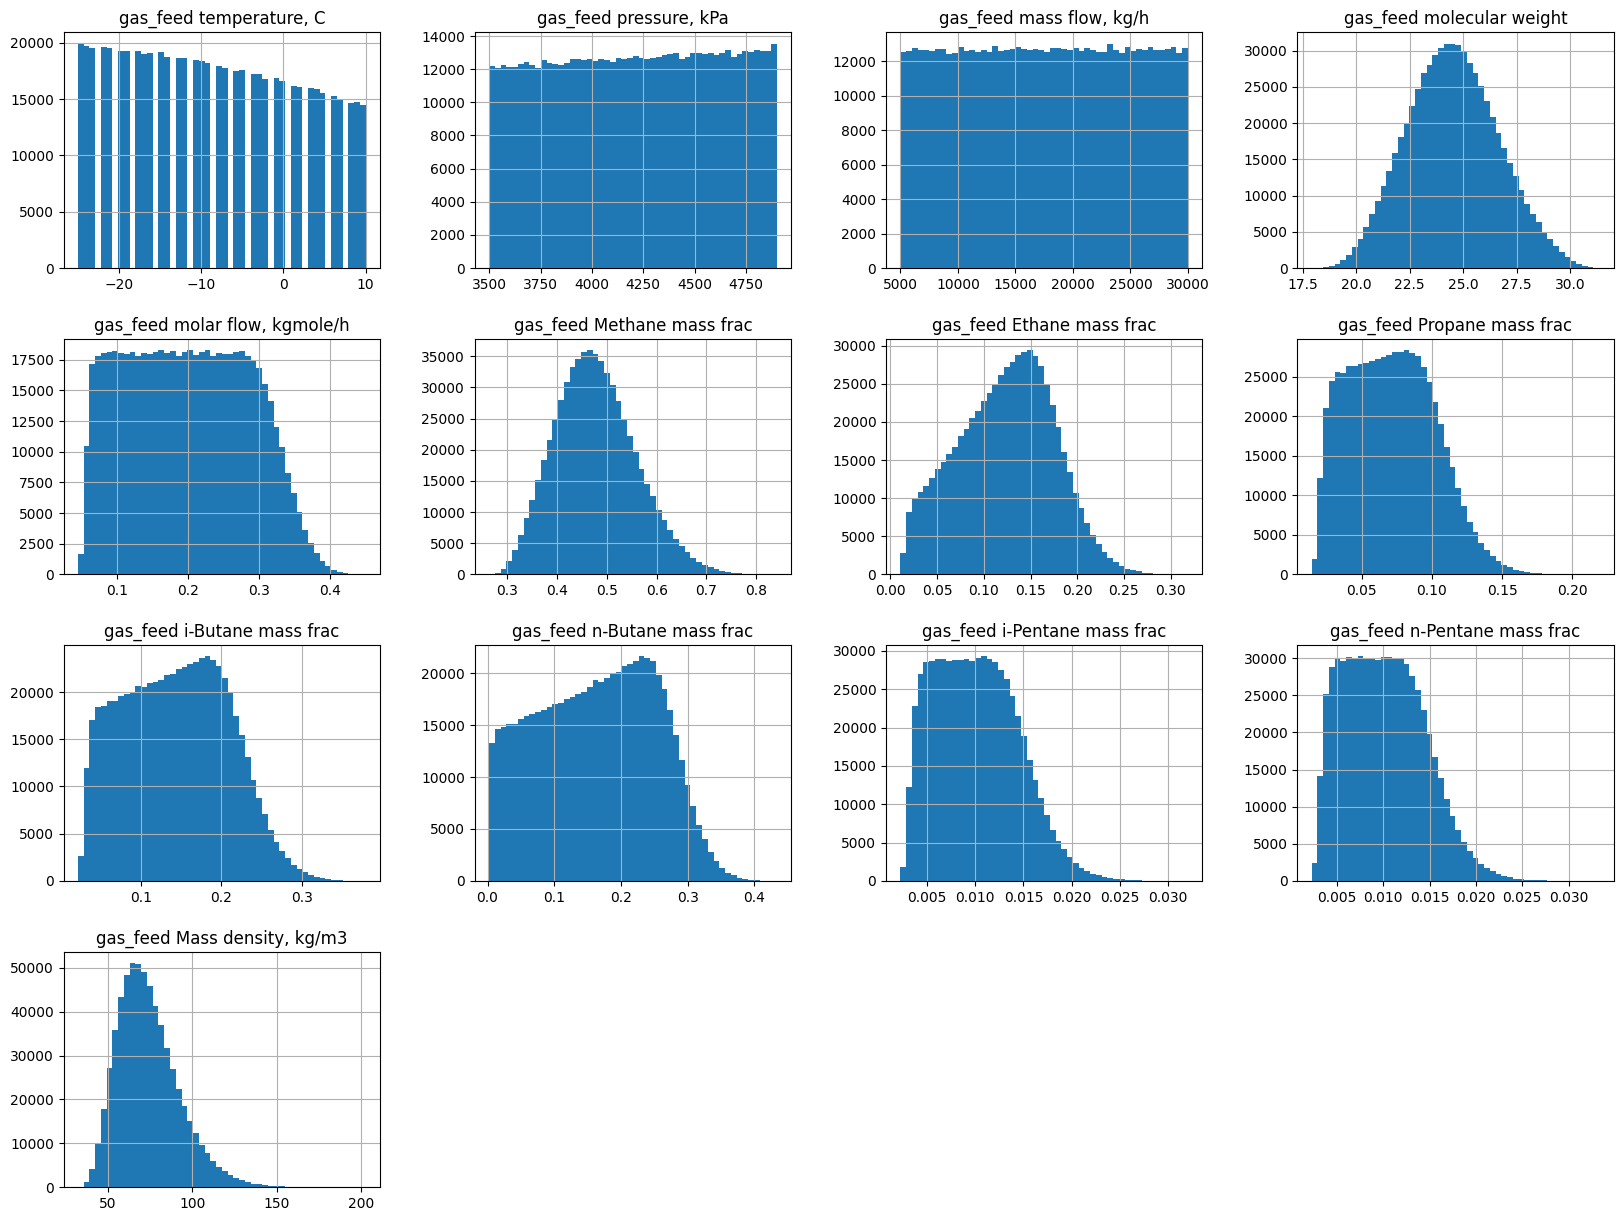

In [24]:
gas_feed_dens_data.hist(bins=50, figsize=(20, 15));

In [25]:
corr_matrix = gas_feed_dens_data.corr()

corr_matrix['gas_feed Mass density, kg/m3'].sort_values(ascending=False)

gas_feed Mass density, kg/m3     1.000000
gas_feed molecular weight        0.739884
gas_feed pressure, kPa           0.507707
gas_feed n-Butane mass frac      0.470699
gas_feed i-Butane mass frac      0.259472
gas_feed Ethane mass frac        0.012255
gas_feed Propane mass frac       0.011486
gas_feed mass flow, kg/h         0.001205
gas_feed n-Pentane mass frac    -0.103936
gas_feed i-Pentane mass frac    -0.104715
gas_feed molar flow, kgmole/h   -0.148174
gas_feed temperature, C         -0.365481
gas_feed Methane mass frac      -0.713992
Name: gas_feed Mass density, kg/m3, dtype: float64

In [26]:
gas_dens_mini_data = gas_feed_dens_data.sample(frac=0.5)

In [27]:
## Тестовая и обучающая выборки
X = gas_dens_mini_data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
]]

y = gas_dens_mini_data[[
    'gas_feed Mass density, kg/m3',
]]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), [
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((253300, 12), (253300, 1))

In [32]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_0.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_0 = gas_feed_dens_model_0.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.8694 - mae: 1.8694
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3107 - mae: 0.3107
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2056 - mae: 0.2056
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1912 - mae: 0.1912
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1833 - mae: 0.1833
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1775 - mae: 0.1775
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1751 - mae: 0.1751
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1730 - mae: 0.1730
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1703 - mae: 0.1703
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.1701 - mae: 0.1701
Epoch 11/20
7916/7916 [======

In [33]:
gas_feed_dens_model_0.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 749us/step - loss: 0.1020 - mae: 0.1020


[0.10197760909795761, 0.10197760909795761]

In [34]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_1.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_1 = gas_feed_dens_model_1.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 10s 1ms/step - loss: 1.1814 - mae: 1.1814
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3168 - mae: 0.3168
Epoch 3/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2871 - mae: 0.2871
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.2719 - mae: 0.2719
Epoch 5/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2656 - mae: 0.2656
Epoch 6/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2555 - mae: 0.2555
Epoch 7/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2498 - mae: 0.2498
Epoch 8/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2419 - mae: 0.2419
Epoch 9/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2336 - mae: 0.2336
Epoch 10/20
7916/7916 [==============================] - 10s 1ms/step - loss: 0.2273 - mae: 0.2273
Epoch 11/20
7916/7916 

In [35]:
gas_feed_dens_model_1.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 916us/step - loss: 0.1503 - mae: 0.1503


[0.15034343302249908, 0.15034343302249908]

In [37]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
gas_feed_dens_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
gas_feed_dens_model_2.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
gas_feed_dens_history_2 = gas_feed_dens_model_2.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
7916/7916 [==============================] - 9s 1ms/step - loss: 1.1029 - mae: 1.1029
Epoch 2/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.5714 - mae: 0.5714
Epoch 3/20
7916/7916 [==============================] - 8s 1ms/step - loss: 0.4602 - mae: 0.4602
Epoch 4/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.4251 - mae: 0.4251
Epoch 5/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3930 - mae: 0.3930
Epoch 6/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3700 - mae: 0.3700
Epoch 7/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3491 - mae: 0.3491
Epoch 8/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3382 - mae: 0.3382
Epoch 9/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3215 - mae: 0.3215
Epoch 10/20
7916/7916 [==============================] - 9s 1ms/step - loss: 0.3050 - mae: 0.3050
Epoch 11/20
7916/7916 [======

In [38]:
gas_feed_dens_model_2.evaluate(X_test_normal, y_test)

1979/1979 [==============================] - 2s 794us/step - loss: 0.1278 - mae: 0.1278


[0.1277880221605301, 0.1277880221605301]

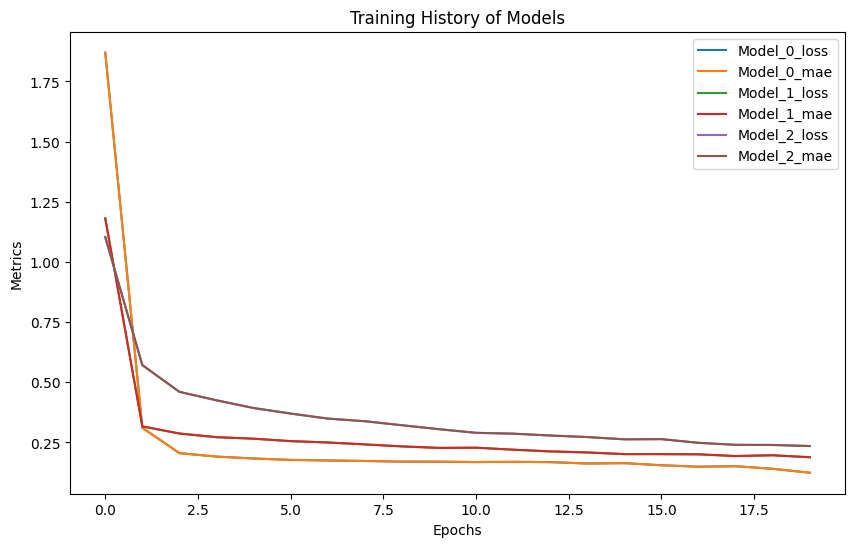

In [41]:
# Создание DataFrame из истории обучения
history_0_df = pd.DataFrame(gas_feed_dens_history_0.history).add_prefix('Model_0_')
history_1_df = pd.DataFrame(gas_feed_dens_history_1.history).add_prefix('Model_1_')
history_2_df = pd.DataFrame(gas_feed_dens_history_2.history).add_prefix('Model_2_')

# Объединение всех DataFrame в один
combined_df = pd.concat([history_0_df, history_1_df, history_2_df], axis=1)

# Построение графика
combined_df.plot(figsize=(10, 6), title='Training History of Models')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='upper right')
plt.show()

# Определяем мольную долю пара в сырьевом потоке

In [11]:
gas_feed_vap_fr = data[[
    'gas_feed temperature, C', 'gas_feed pressure, kPa', 'gas_feed mass flow, kg/h', 'gas_feed molecular weight',
    'gas_feed Mass density, kg/m3', 'gas_feed molar flow, kgmole/h',
    'gas_feed Methane mass frac', 'gas_feed Ethane mass frac', 'gas_feed Propane mass frac', 'gas_feed i-Butane mass frac',
    'gas_feed n-Butane mass frac', 'gas_feed i-Pentane mass frac', 'gas_feed n-Pentane mass frac',
    'gas_feed vapour fraction',
]]

In [13]:
gas_feed_vap_fr.describe()

,"gas_feed temperature, C","gas_feed pressure, kPa","gas_feed mass flow, kg/h",gas_feed molecular weight,"gas_feed Mass density, kg/m3","gas_feed molar flow, kgmole/h",gas_feed Methane mass frac,gas_feed Ethane mass frac,gas_feed Propane mass frac,gas_feed i-Butane mass frac,gas_feed n-Butane mass frac,gas_feed i-Pentane mass frac,gas_feed n-Pentane mass frac,gas_feed vapour fraction
count,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000,633250.000000
mean,-8.453983,4209.143296,17509.966951,24.522286,74.084199,0.199824,0.478100,0.123451,0.071425,0.143169,0.163620,0.010120,0.010114,0.763452
std,10.275480,404.079523,7214.000778,2.113006,18.272784,0.084434,0.080897,0.051093,0.030432,0.064367,0.087054,0.004282,0.004284,0.104859
min,-25.000000,3500.000000,5000.000000,17.914715,32.152684,0.045560,0.263626,0.010702,0.014382,0.020922,0.002471,0.002245,0.002278,0.312539
25%,-17.000000,3861.000000,11270.000000,23.020770,60.824100,0.127574,0.419969,0.085843,0.046374,0.089984,0.091384,0.006594,0.006586,0.692753
50%,-9.000000,4214.000000,17512.000000,24.479015,71.535329,0.198404,0.472891,0.126745,0.070364,0.143793,0.167682,0.009869,0.009859,0.766630
75%,0.000000,4560.000000,23749.750000,25.973181,84.574906,0.269190,0.530332,0.160758,0.093590,0.192866,0.234552,0.013172,0.013167,0.838392
max,10.000000,4900.000000,30000.000000,31.365853,202.689706,0.449307,0.841226,0.318581,0.219201,0.379860,0.433455,0.032060,0.033310,1.000000


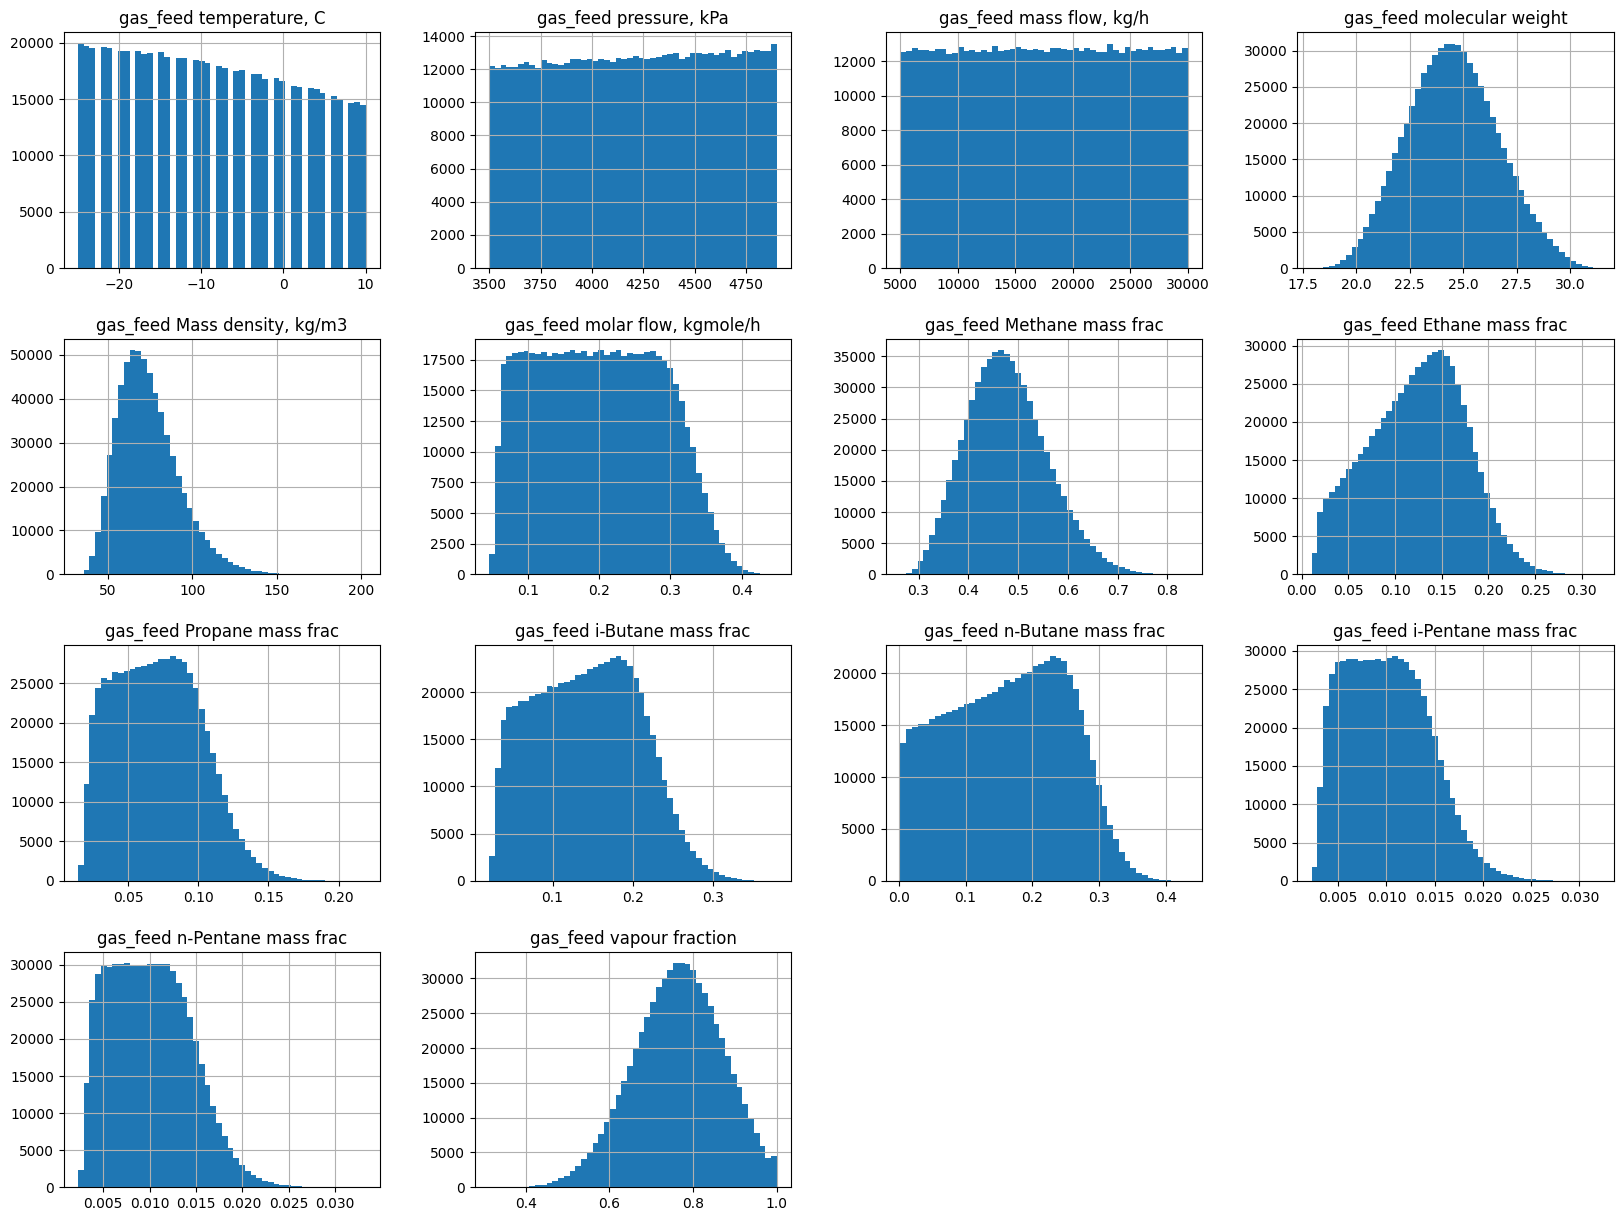

In [14]:
gas_feed_vap_fr.hist(bins=50, figsize=(20, 15));

In [15]:
corr_matrix = gas_feed_vap_fr.corr()

corr_matrix['gas_feed vapour fraction'].sort_values(ascending=False)

gas_feed vapour fraction         1.000000
gas_feed Methane mass frac       0.859235
gas_feed temperature, C          0.387047
gas_feed molar flow, kgmole/h    0.182043
gas_feed i-Pentane mass frac     0.133693
gas_feed n-Pentane mass frac     0.132885
gas_feed Ethane mass frac        0.054279
gas_feed Propane mass frac       0.001568
gas_feed mass flow, kg/h        -0.001075
gas_feed pressure, kPa          -0.138282
gas_feed i-Butane mass frac     -0.314929
gas_feed n-Butane mass frac     -0.611127
gas_feed molecular weight       -0.895929
gas_feed Mass density, kg/m3    -0.906108
Name: gas_feed vapour fraction, dtype: float64